In [4]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.5.1'

In [13]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [16]:
# 80% train, 20% test
train_test_split = int(0.8 * len(X))
X_train, y_train = X[:train_test_split], y[:train_test_split]
X_test, y_test = X[train_test_split:], y[train_test_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [50]:
# plot
def plot_predictions(training_data=X_train, 
                     training_label=y_train, 
                     testing_data=X_test, 
                     testing_label=y_test, 
                     predictions=None):
    plt.scatter(training_data, training_label, c="b", s=4, label="Training Data")
    plt.scatter(testing_data, testing_label, c="g", s=4, label="Testing Data")
    if predictions is not None:
        plt.scatter(testing_data, predictions, c="g", s=4, label="Testing Data")

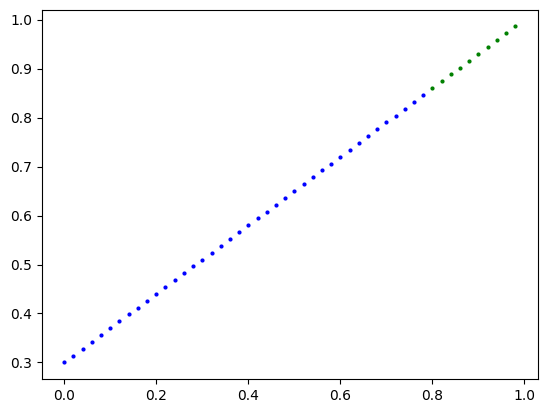

In [51]:
plot_predictions()

In [28]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.rand(1, dtype=torch.float), requires_grad=True)
    def forward(self, X):
        return self.weights * X + self.bias

In [42]:
torch.manual_seed(42)

model = LinearRegressionModel()
model.parameters()

<generator object Module.parameters at 0x10d7579e0>

In [43]:
model.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [49]:
with torch.inference_mode():
    y_preds = model(X_test)
y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

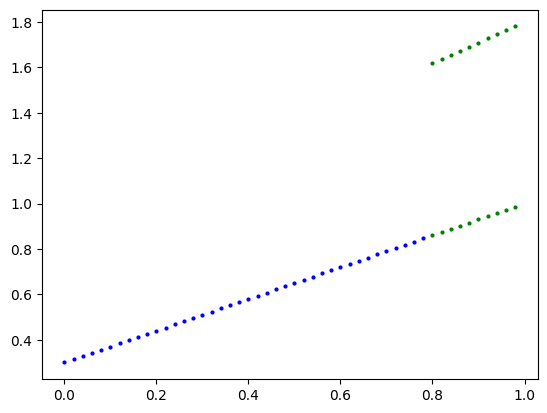

In [52]:
plot_predictions(predictions=y_preds)